In [1]:
!pip install pandas_datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('ggplot')
%matplotlib inline

In [3]:
import yfinance as yf
import datetime as dt

stock='POWERGRID.NS'
start=dt.datetime(2000,1,1)
end=dt.datetime(2025,6,1)

df=yf.download(stock,start,end)

C:\Users\osawa\AppData\Local\Temp\ipykernel_23032\3849292121.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()


Price             Close         High          Low         Open       Volume
Ticker     POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS
Date                                                                       
2007-10-05    32.545414    35.424681    26.900111    29.051473    855215656
2007-10-08    30.879326    33.645363    30.685217    33.645363    126671715
2007-10-09    32.982166    33.273327    29.229414    30.895505    116725709
2007-10-10    33.289516    33.968895    32.998355    33.839488     67931378
2007-10-11    37.009903    38.821577    32.998342    38.821577    106320954

In [5]:
df.shape

(4350, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4350 entries, 2007-10-05 to 2025-05-30
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4350 non-null   float64
 1   (High, POWERGRID.NS)    4350 non-null   float64
 2   (Low, POWERGRID.NS)     4350 non-null   float64
 3   (Open, POWERGRID.NS)    4350 non-null   float64
 4   (Volume, POWERGRID.NS)  4350 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 203.9 KB


In [7]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [8]:
df.describe()

Price         Close         High          Low         Open        Volume
Ticker POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS  POWERGRID.NS
count   4350.000000  4350.000000  4350.000000  4350.000000  4.350000e+03
mean      86.576784    87.704855    85.465673    86.616079  1.195178e+07
std       73.584232    74.475128    72.665009    73.575716  2.031694e+07
min       19.001738    20.312202    17.036041    20.213917  0.000000e+00
25%       36.784888    37.304653    36.245946    36.846279  4.889596e+06
50%       65.436489    66.555357    63.530365    64.960960  8.524606e+06
75%       86.333355    87.387719    85.170752    86.507490  1.382501e+07
max      356.113861   356.893408   348.074624   354.749603  8.552157e+08

In [9]:
df=df.reset_index()

In [10]:
df.head()

Price        Date        Close         High          Low         Open  \
Ticker            POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS   
0      2007-10-05    32.545414    35.424681    26.900111    29.051473   
1      2007-10-08    30.879326    33.645363    30.685217    33.645363   
2      2007-10-09    32.982166    33.273327    29.229414    30.895505   
3      2007-10-10    33.289516    33.968895    32.998355    33.839488   
4      2007-10-11    37.009903    38.821577    32.998342    38.821577   

Price        Volume  
Ticker POWERGRID.NS  
0         855215656  
1         126671715  
2         116725709  
3          67931378  
4         106320954

In [11]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [12]:
df.to_csv("powergrid.csv")

In [13]:
data1=pd.read_csv("powergrid.csv")

In [14]:
data1.head()

Price        Date               Close               High  \
0  Ticker         NaN        POWERGRID.NS       POWERGRID.NS   
1       0  2007-10-05  32.545413970947266   35.4246808733301   
2       1  2007-10-08   30.87932586669922  33.64536260594671   
3       2  2007-10-09    32.9821662902832  33.27332717981798   
4       3  2007-10-10   33.28951644897461  33.96889505208489   

                  Low                Open        Volume  
0        POWERGRID.NS        POWERGRID.NS  POWERGRID.NS  
1  26.900110589283805  29.051473270485566     855215656  
2  30.685217178555753   33.64536260594671     126671715  
3  29.229413747593593   30.89550520408466     116725709  
4  32.998355444192676     33.839488454654      67931378

### Candlesticks

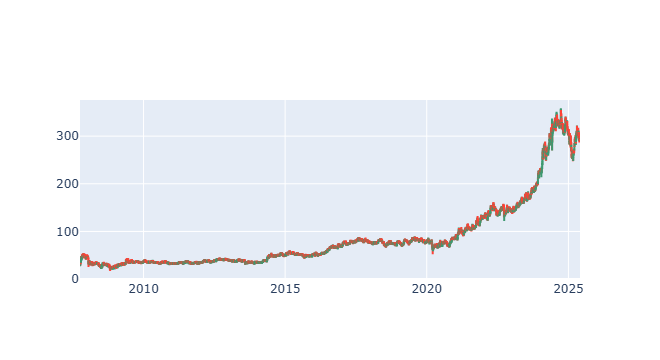

In [16]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Candlestick(x=data1['Date'],open=data1['Open'],
                   high=data1['High'],
                    low=data1['Low'],
                     close=data1["Close"] ) ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [17]:
df=df.drop(['Date'],axis=1)

C:\Users\osawa\AppData\Local\Temp\ipykernel_23032\1039762504.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [18]:
df.head()

Price         Close         High          Low         Open       Volume
Ticker POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS
0         32.545414    35.424681    26.900111    29.051473    855215656
1         30.879326    33.645363    30.685217    33.645363    126671715
2         32.982166    33.273327    29.229414    30.895505    116725709
3         33.289516    33.968895    32.998355    33.839488     67931378
4         37.009903    38.821577    32.998342    38.821577    106320954

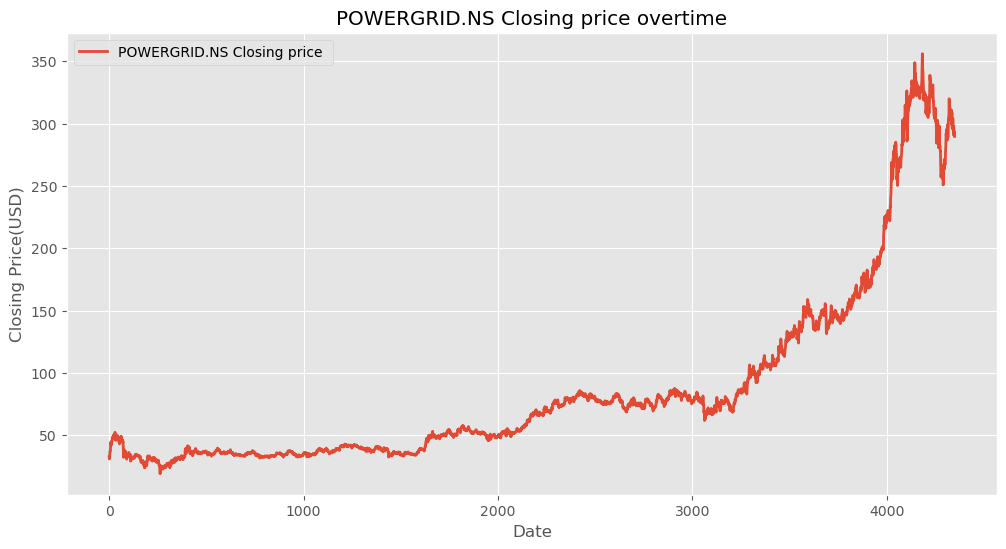

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label=f"{stock} Closing price ",linewidth=2)
plt.title(f'{stock} Closing price overtime')
plt.xlabel('Date')
plt.ylabel('Closing Price(USD)')
plt.legend()
plt.show()


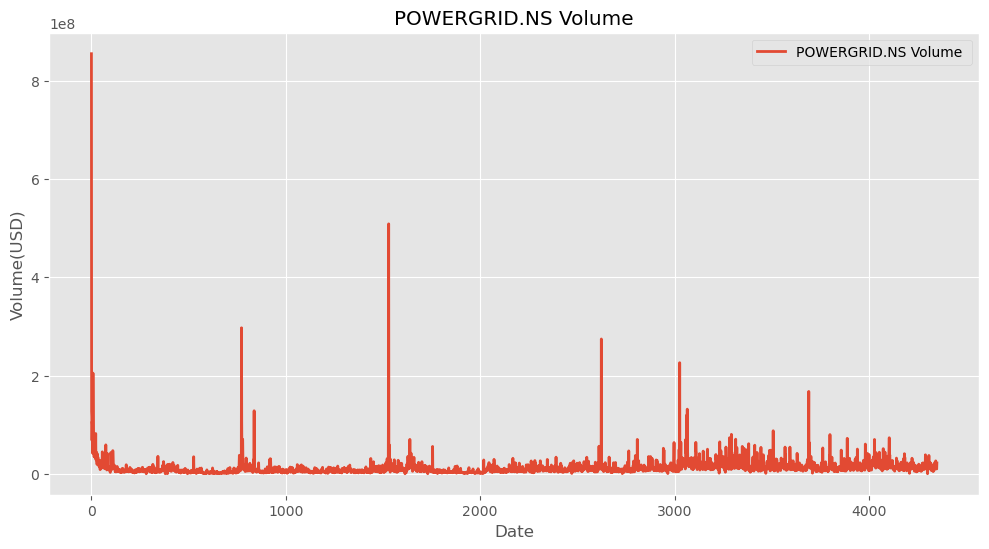

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df['Volume'],label=f"{stock} Volume ",linewidth=2)
plt.title(f'{stock} Volume')
plt.xlabel('Date')
plt.ylabel('Volume(USD)')
plt.legend()
plt.show()


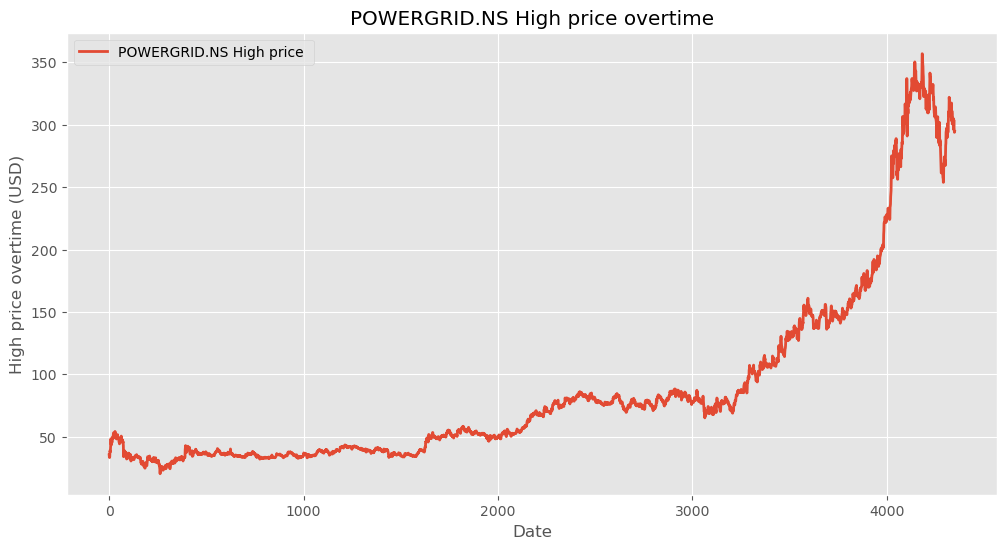

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df['High'],label=f"{stock} High price ",linewidth=2)
plt.title(f'{stock} High price overtime')
plt.xlabel('Date')
plt.ylabel('High price overtime (USD)')
plt.legend()
plt.show()


In [22]:
temp_data=[10,20,30,40,50,60,70,80,90]
print(sum(temp_data[0:5])/5)

30.0


In [23]:
import pandas as pd
df1=pd.DataFrame(temp_data)

In [24]:
df1.rolling(5).mean()

0
0   NaN
1   NaN
2   NaN
3   NaN
4  30.0
5  40.0
6  50.0
7  60.0
8  70.0

In [25]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker  POWERGRID.NS
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
...              ...
4345      288.417137
4346      288.322689
4347      288.182874
4348      288.045755
4349      287.828185

[4350 rows x 1 columns]

In [26]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker  POWERGRID.NS
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
...              ...
4345      306.140360
4346      305.956670
4347      305.765886
4348      305.530249
4349      305.323284

[4350 rows x 1 columns]

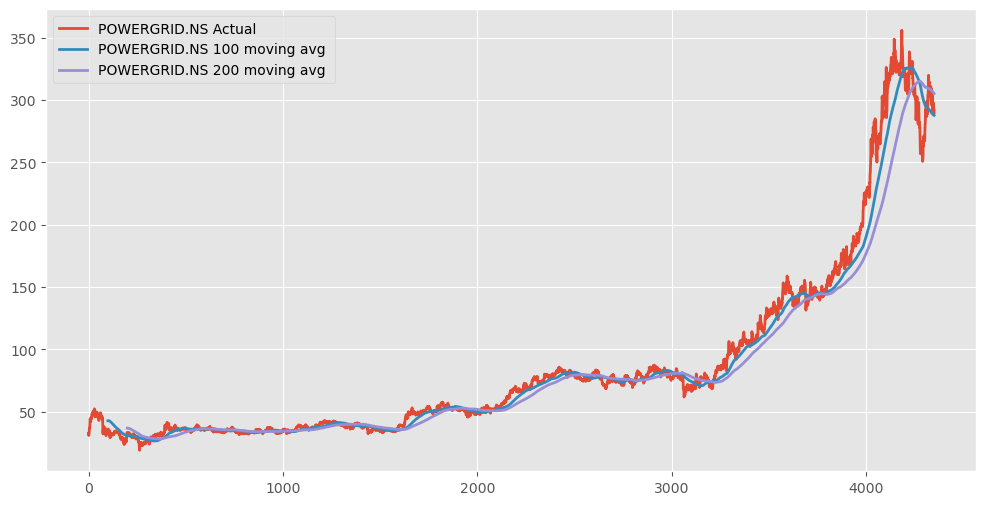

In [27]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,label=f"{stock} Actual ",linewidth=2)
plt.plot(ma100,label=f"{stock} 100 moving avg ",linewidth=2)
plt.plot(ma200,label=f"{stock} 200 moving avg ",linewidth=2)


plt.legend()
plt.show()

In [28]:
ema100=df.Close.ewm(span=100,adjust=False).mean()

In [29]:
ema200=df.Close.ewm(span=200,adjust=False).mean()

In [30]:
ema100

Ticker  POWERGRID.NS
0          32.545414
1          32.512422
2          32.521724
3          32.536928
4          32.625502
...              ...
4345      295.739230
4346      295.715680
4347      295.625271
4348      295.575265
4349      295.459914

[4350 rows x 1 columns]

In [31]:
df.pct_change()

Price         Close         High           Low         Open       Volume
Ticker POWERGRID.NS POWERGRID.NS  POWERGRID.NS POWERGRID.NS POWERGRID.NS
0               NaN          NaN           NaN          NaN          NaN
1         -0.051193    -0.050228  1.407097e-01     0.158129    -0.851883
2          0.068099    -0.011058 -4.744315e-02    -0.081731    -0.078518
3          0.009319     0.020905  1.289435e-01     0.095288    -0.418026
4          0.111759     0.142857 -4.140816e-07     0.147227     0.565123
...             ...          ...           ...          ...          ...
4345      -0.004696     0.016904  1.371037e-02     0.027568     0.668263
4346      -0.007246    -0.020408 -1.200334e-02    -0.010165     0.036771
4347      -0.011543    -0.006552 -5.817974e-03    -0.008249    -0.408514
4348       0.006698    -0.005919  2.926011e-03    -0.010864    -0.032243
4349      -0.011430     0.002552 -1.064014e-02     0.002231     1.229279

[4350 rows x 5 columns]

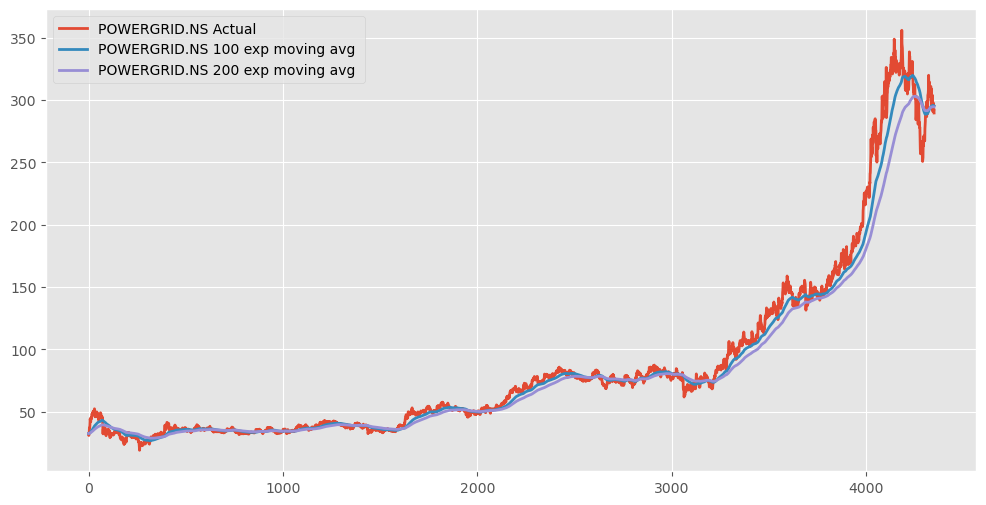

In [32]:
plt.figure(figsize=(12,6))
plt.plot(df.Close,label=f"{stock} Actual ",linewidth=2)
plt.plot(ema100,label=f"{stock} 100 exp moving avg ",linewidth=2)
plt.plot(ema200,label=f"{stock} 200 exp moving avg ",linewidth=2)


plt.legend()
plt.show()

In [33]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])



In [34]:
data_training.shape

(3045, 1)

In [35]:
data_test.shape

(1305, 1)

In [36]:
from sklearn.preprocessing  import MinMaxScaler

In [37]:
scaler = MinMaxScaler(feature_range =(0,1))

In [38]:
data_training_array=scaler.fit_transform(data_training)
data_test


Ticker  POWERGRID.NS
3045       77.472038
3046       78.195099
3047       76.893547
3048       76.914230
3049       76.790268
...              ...
4345      296.700012
4346      294.549988
4347      291.149994
4348      293.100006
4349      289.750000

[1305 rows x 1 columns]

In [39]:
X_train=[]
y_train=[]

In [40]:
for i in range(100,data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)
    

In [41]:
X_train.shape

(2945, 100, 1)

In [42]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [245]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))


C:\Users\osawa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [247]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

In [249]:
model.compile(optimizer='adam',loss='mean_squared_error')
history=model.fit(X_train,y_train,epochs=50)

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - loss: 0.0492
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - loss: 0.0034
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - loss: 0.0034
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - loss: 0.0033
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - loss: 0.0031
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - loss: 0.0031
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - loss: 0.0030
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - loss: 0.0027
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - loss: 0.0027
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - loss: 0.0040
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - loss: 0.0035
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - loss: 0.0020
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - loss: 0.0020
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - loss: 0.0021
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 

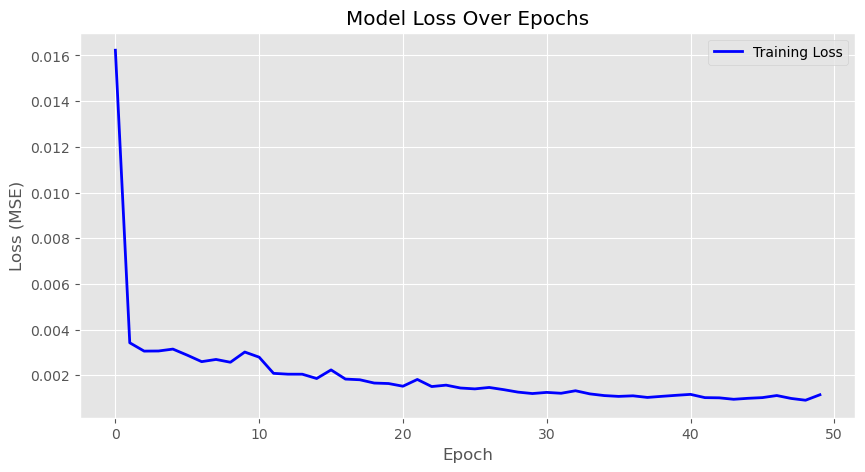

In [255]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [273]:
data_training.tail()

Ticker  POWERGRID.NS
3040       78.236404
3041       78.732224
3042       76.067207
3043       75.860619
3044       76.439056

In [304]:
past_100_days = data_training.tail(100)


final_df = pd.concat([past_100_days, data_test], ignore_index=True)


In [306]:
input_data=scaler.transform(final_df)

In [308]:
X_test=[]
y_test=[]

for i in range(100,len(input_data)):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

X_test,y_test=np.array(X_test),np.array(y_test)
    

In [310]:
y_predict = model.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step


In [311]:
y_predict.shape

(1305, 1)

In [312]:
scaler.scale_

array([0.01462571])

In [289]:
y_predicted.shape

(1305, 1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


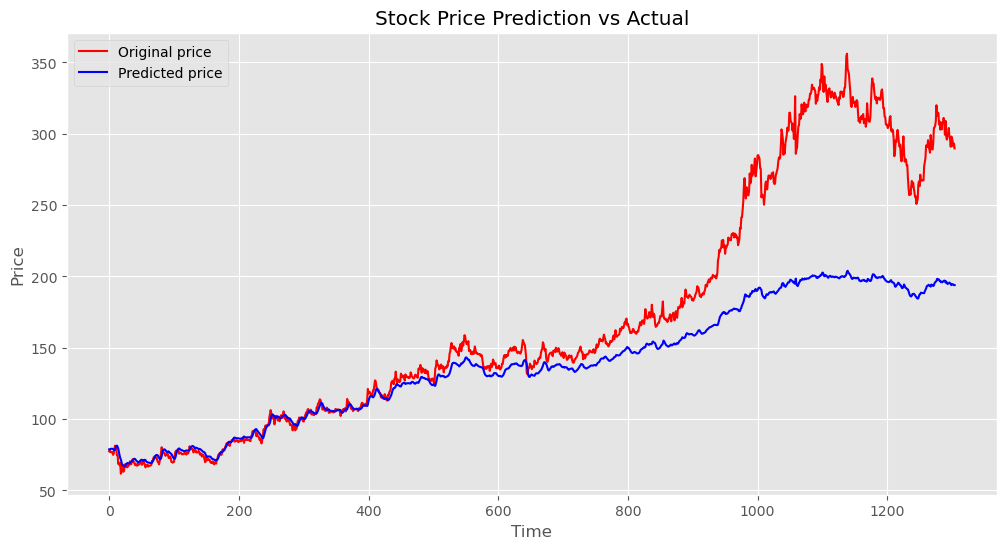

In [316]:

y_predicted = model.predict(X_test)  


y_predicted = y_predicted.reshape(-1, 1)


y_predicted_actual = scaler.inverse_transform(y_predicted)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Original price", color="red")
plt.plot(y_predicted_actual, label="Predicted price", color="blue")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Stock Price Prediction vs Actual")
plt.legend()
plt.show()


In [318]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_actual, y_predicted_actual)
print("MAE:", mae)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_actual, y_predicted_actual)
print("MSE:", mse)



MAE: 33.71807953991652
MSE: 3087.078641525495


In [299]:
model.save('stock_model.h5')